# Heart disease UCI - Exploratory Data Analisys (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py


import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Features:

Age: age in years;
    
Sex: 1 = male; 0 = female;
    
Cp: chest pain type: 0 - Typical angina; 1 - atypical angina; 2 - non-anginal pain; 3 - asymptomatic;
        
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
chol: serum cholestoral in mg/dl
    
fbs: fastin blood sugar: 1 - true; 0 - false)
        
restecg: resting electrocardiographic results: 0 - normal ; 1 - wave abornamility - T wave inversions and/or ST elevation or depression of > 0.05 mV; 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
    
exang: exercise induced angina: 1 - yes; 0 - no
        
oldpeak: ST depression induced by exercise relative to rest
    
slope: the slope of the peak exercise ST segment: 0 - upsloping; 1 - flat; 2 - downsloping;
        
ca: number of major vessels (0-3) colored by flourosopy
    
thal: 1 - normal; 2 - fixed defect; 3 - reversable defect **CHECK**
    
target: 0 - Healthy; 1 - sick (heart disease)
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## divide these features in two groups: quantitative and categorical

Quantitative features: Age, trestbps, chol, thalach, oldpeak

Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal

In [9]:
num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [10]:
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,No,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,No,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,No,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,No,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,Yes,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,Yes,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,No,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,No,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,Yes,1.2,1,1,3,0


In [12]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data visualization

In [13]:
plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

Text(0.5, 1.0, 'Age distribuition')

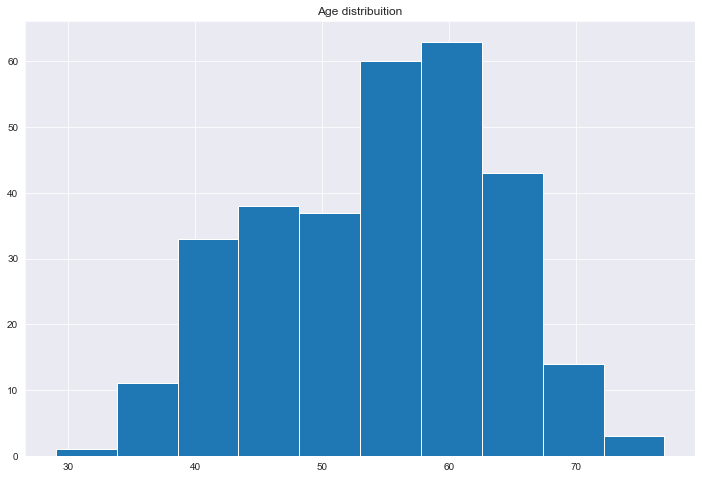

In [16]:
df['age'].hist(grid=True, bins=10); 
plt.title('Age distribuition')

Apparently, the age feature not follow a normal distribution. It's not so clear in this chart. Let's plot a density plot using seaborn.

Obs.: bin param can affect the shape of distribution.

### Density plots using seaborn

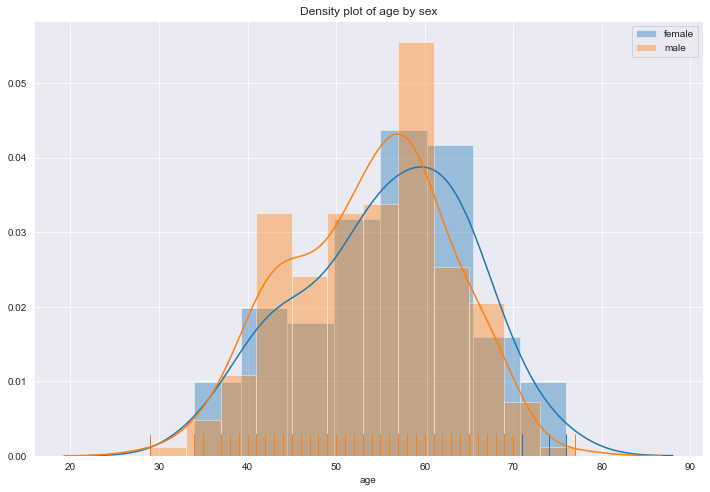

In [19]:
sns.distplot(df[df['sex']=='female']['age'], rug=True, hist=True, label='female')
sns.distplot(df[df['sex']=='male']['age'], rug=True, hist=True, label='male')
plt.legend()
plt.title('Density plot of age by sex');

# rug : bool, optional #控制是否显示观测的小细条（边际毛毯）

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

### Using Plotly

In [18]:
age = df['age']
layout = go.Layout(barmode='overlay')
data = go.Histogram(x=age, opacity=0.6, xbins={'size': 4})
fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

## Resting blood pressure (in mm Hg on admission to the hospital)

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

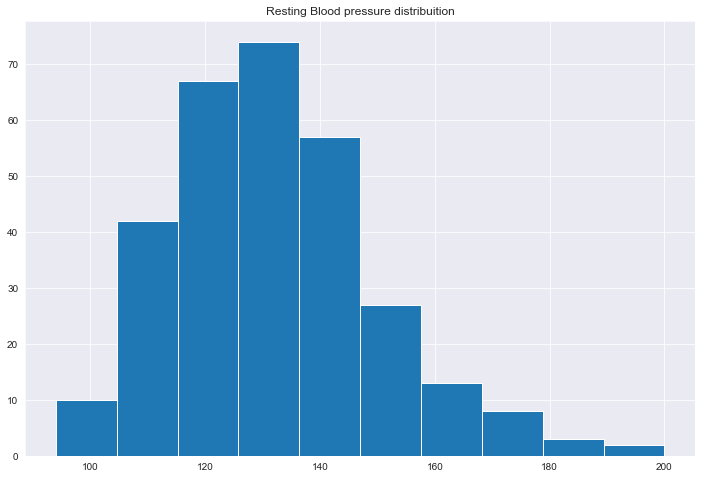

In [20]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

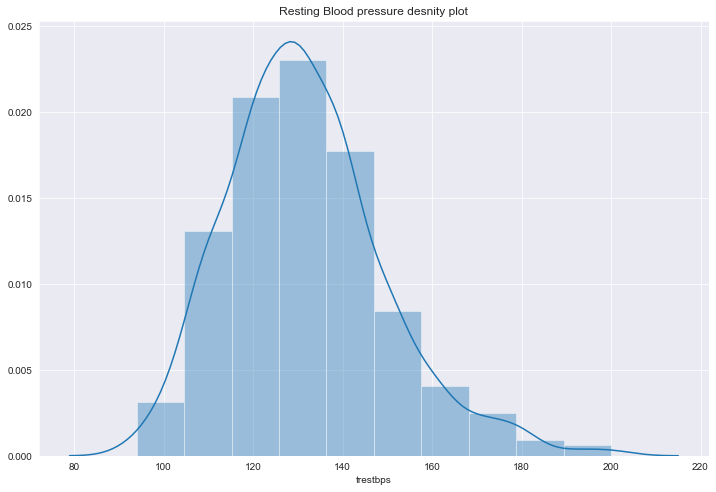

In [21]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

Interesting, it seems that we have a normal distribution

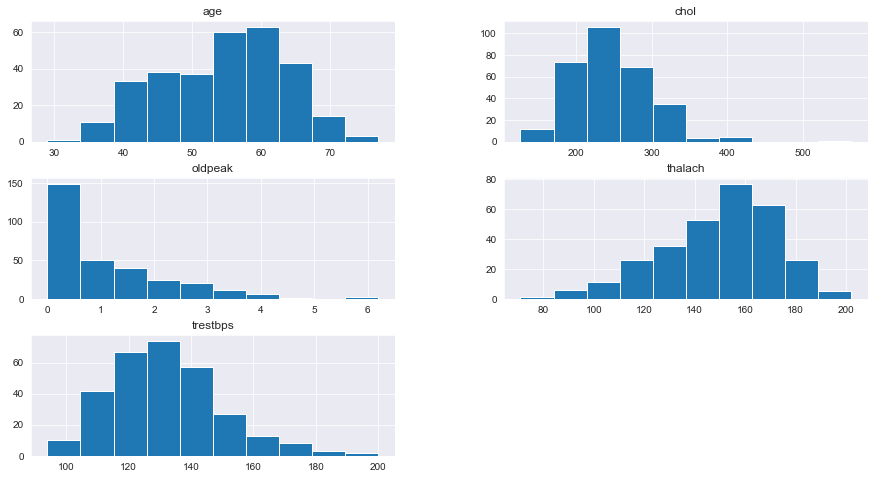

In [22]:
plt.rcParams['figure.figsize']= (15,8) # reajustar o tamanho da figura 

df[[ 'age','trestbps', 'chol', 'thalach', 'oldpeak']].hist();

Chol: apparently is quite close to a normal distribution. However it is possible to notice a high value (acmia of 500) that can be a possible outlier!

Oldpeak: It seems to follow a left-skewed distribution (lognormal).

Thalach: the maximum heart rate achieved seems to follow a right-skewed distribution

Trestbps: Resting blood pressure appears to follow a normal distribution.

## check outliers presence using boxplots

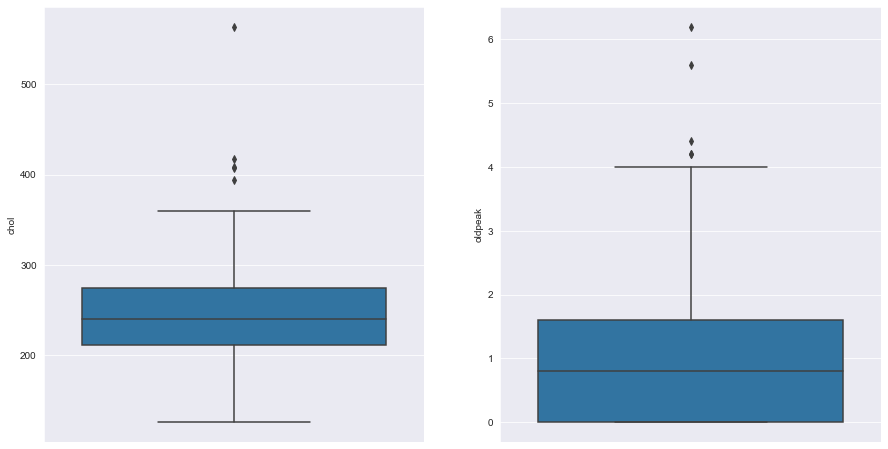

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1]);

## Categorical features

In [24]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [26]:
df['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

In [30]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

IndexError: index 2 is out of bounds for axis 0 with size 2

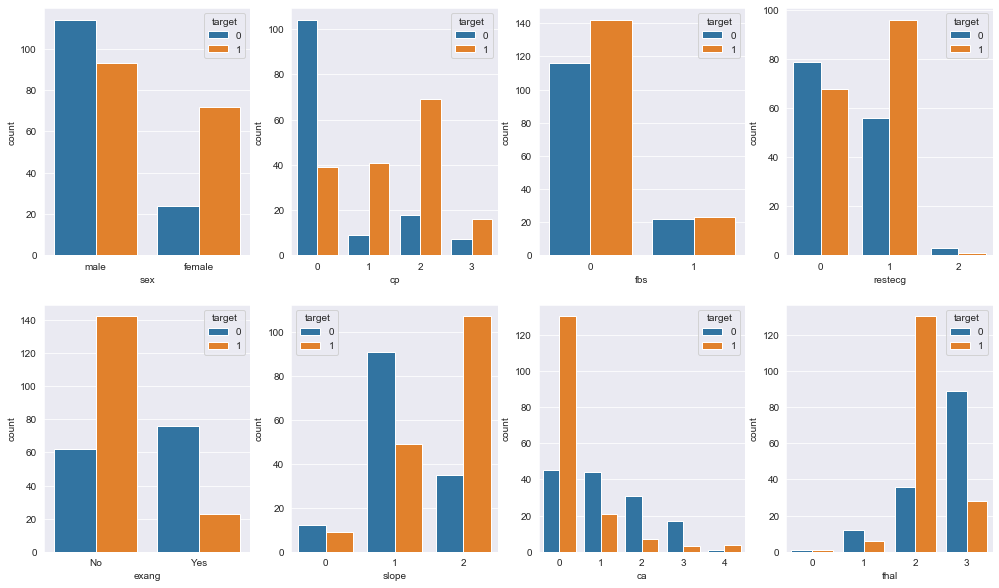

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


for idx, feature in enumerate(cat_feat):
    #print(idx, feature)
    ax = axes[int(idx/4), idx%4]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax)

Text(0.5, 1.0, 'Count of target feature by sex')

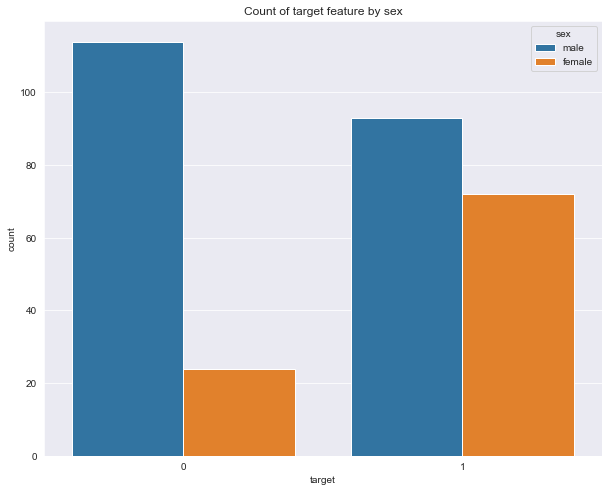

In [31]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [32]:
pd.crosstab(df['sex'], df['target'], normalize=True)

target,0,1
sex,,
female,0.079208,0.237624
male,0.376238,0.306931


most are healthy and are male.

In [34]:
sex_target = df.groupby(by=['sex', 'target']).size()

sex_target

sex     target
female  0          24
        1          72
male    0         114
        1          93
dtype: int64

In [35]:
sex_target.groupby(level=0)

In [36]:
# level =0  按行 取出 一级标签 

sex_target_pcts = sex_target.groupby(level=0).apply(lambda x: 100*x/x.sum())

sex_target_pcts

sex     target
female  0         25.000000
        1         75.000000
male    0         55.072464
        1         44.927536
dtype: float64

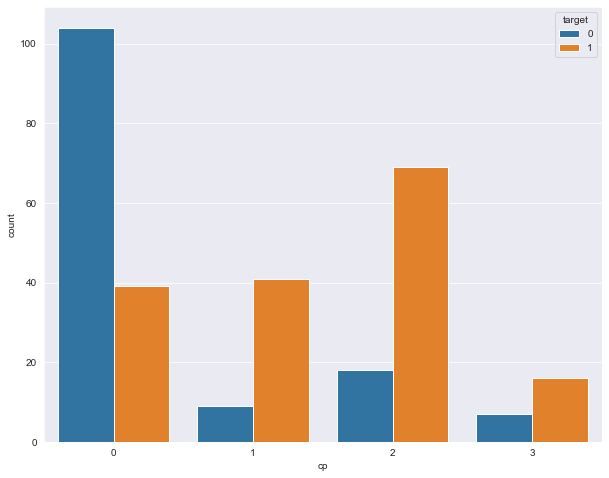

In [37]:
sns.countplot(x='cp', hue='target', data=df)

Most patients who experience some type of pain have heart disease

### Multivariate visualization

In [38]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
df.sex

0        male
1        male
2      female
3        male
4      female
        ...  
298    female
299      male
300      male
301      male
302    female
Name: sex, Length: 303, dtype: object

In [40]:
df.exang

0       No
1       No
2       No
3       No
4      Yes
      ... 
298    Yes
299     No
300     No
301    Yes
302     No
Name: exang, Length: 303, dtype: object

In [41]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['exang'] = df['exang'].map({'No': 0, 'Yes': 1})

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


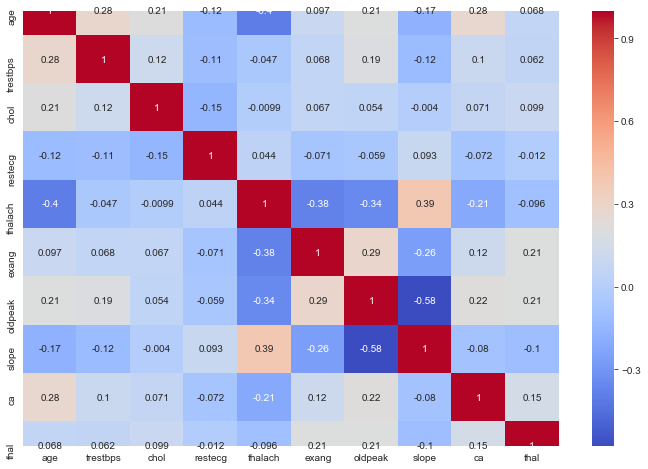

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['target', 'sex', 'cp', 'fbs'], axis=1).corr(), annot=True, cmap='coolwarm');

### Scatterplot matrix

In [48]:
df.columns

#df.num_cont_feat

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

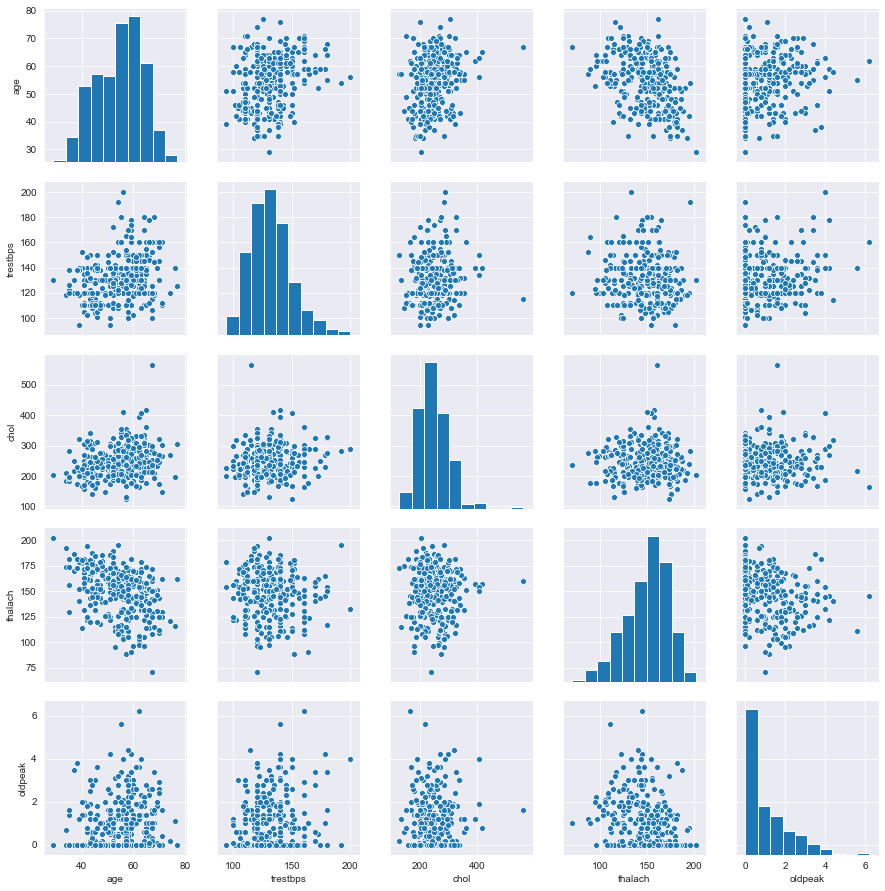

In [44]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
sns.pairplot(df[num_cont_feat])  # ?

<Figure size 2160x2160 with 0 Axes>

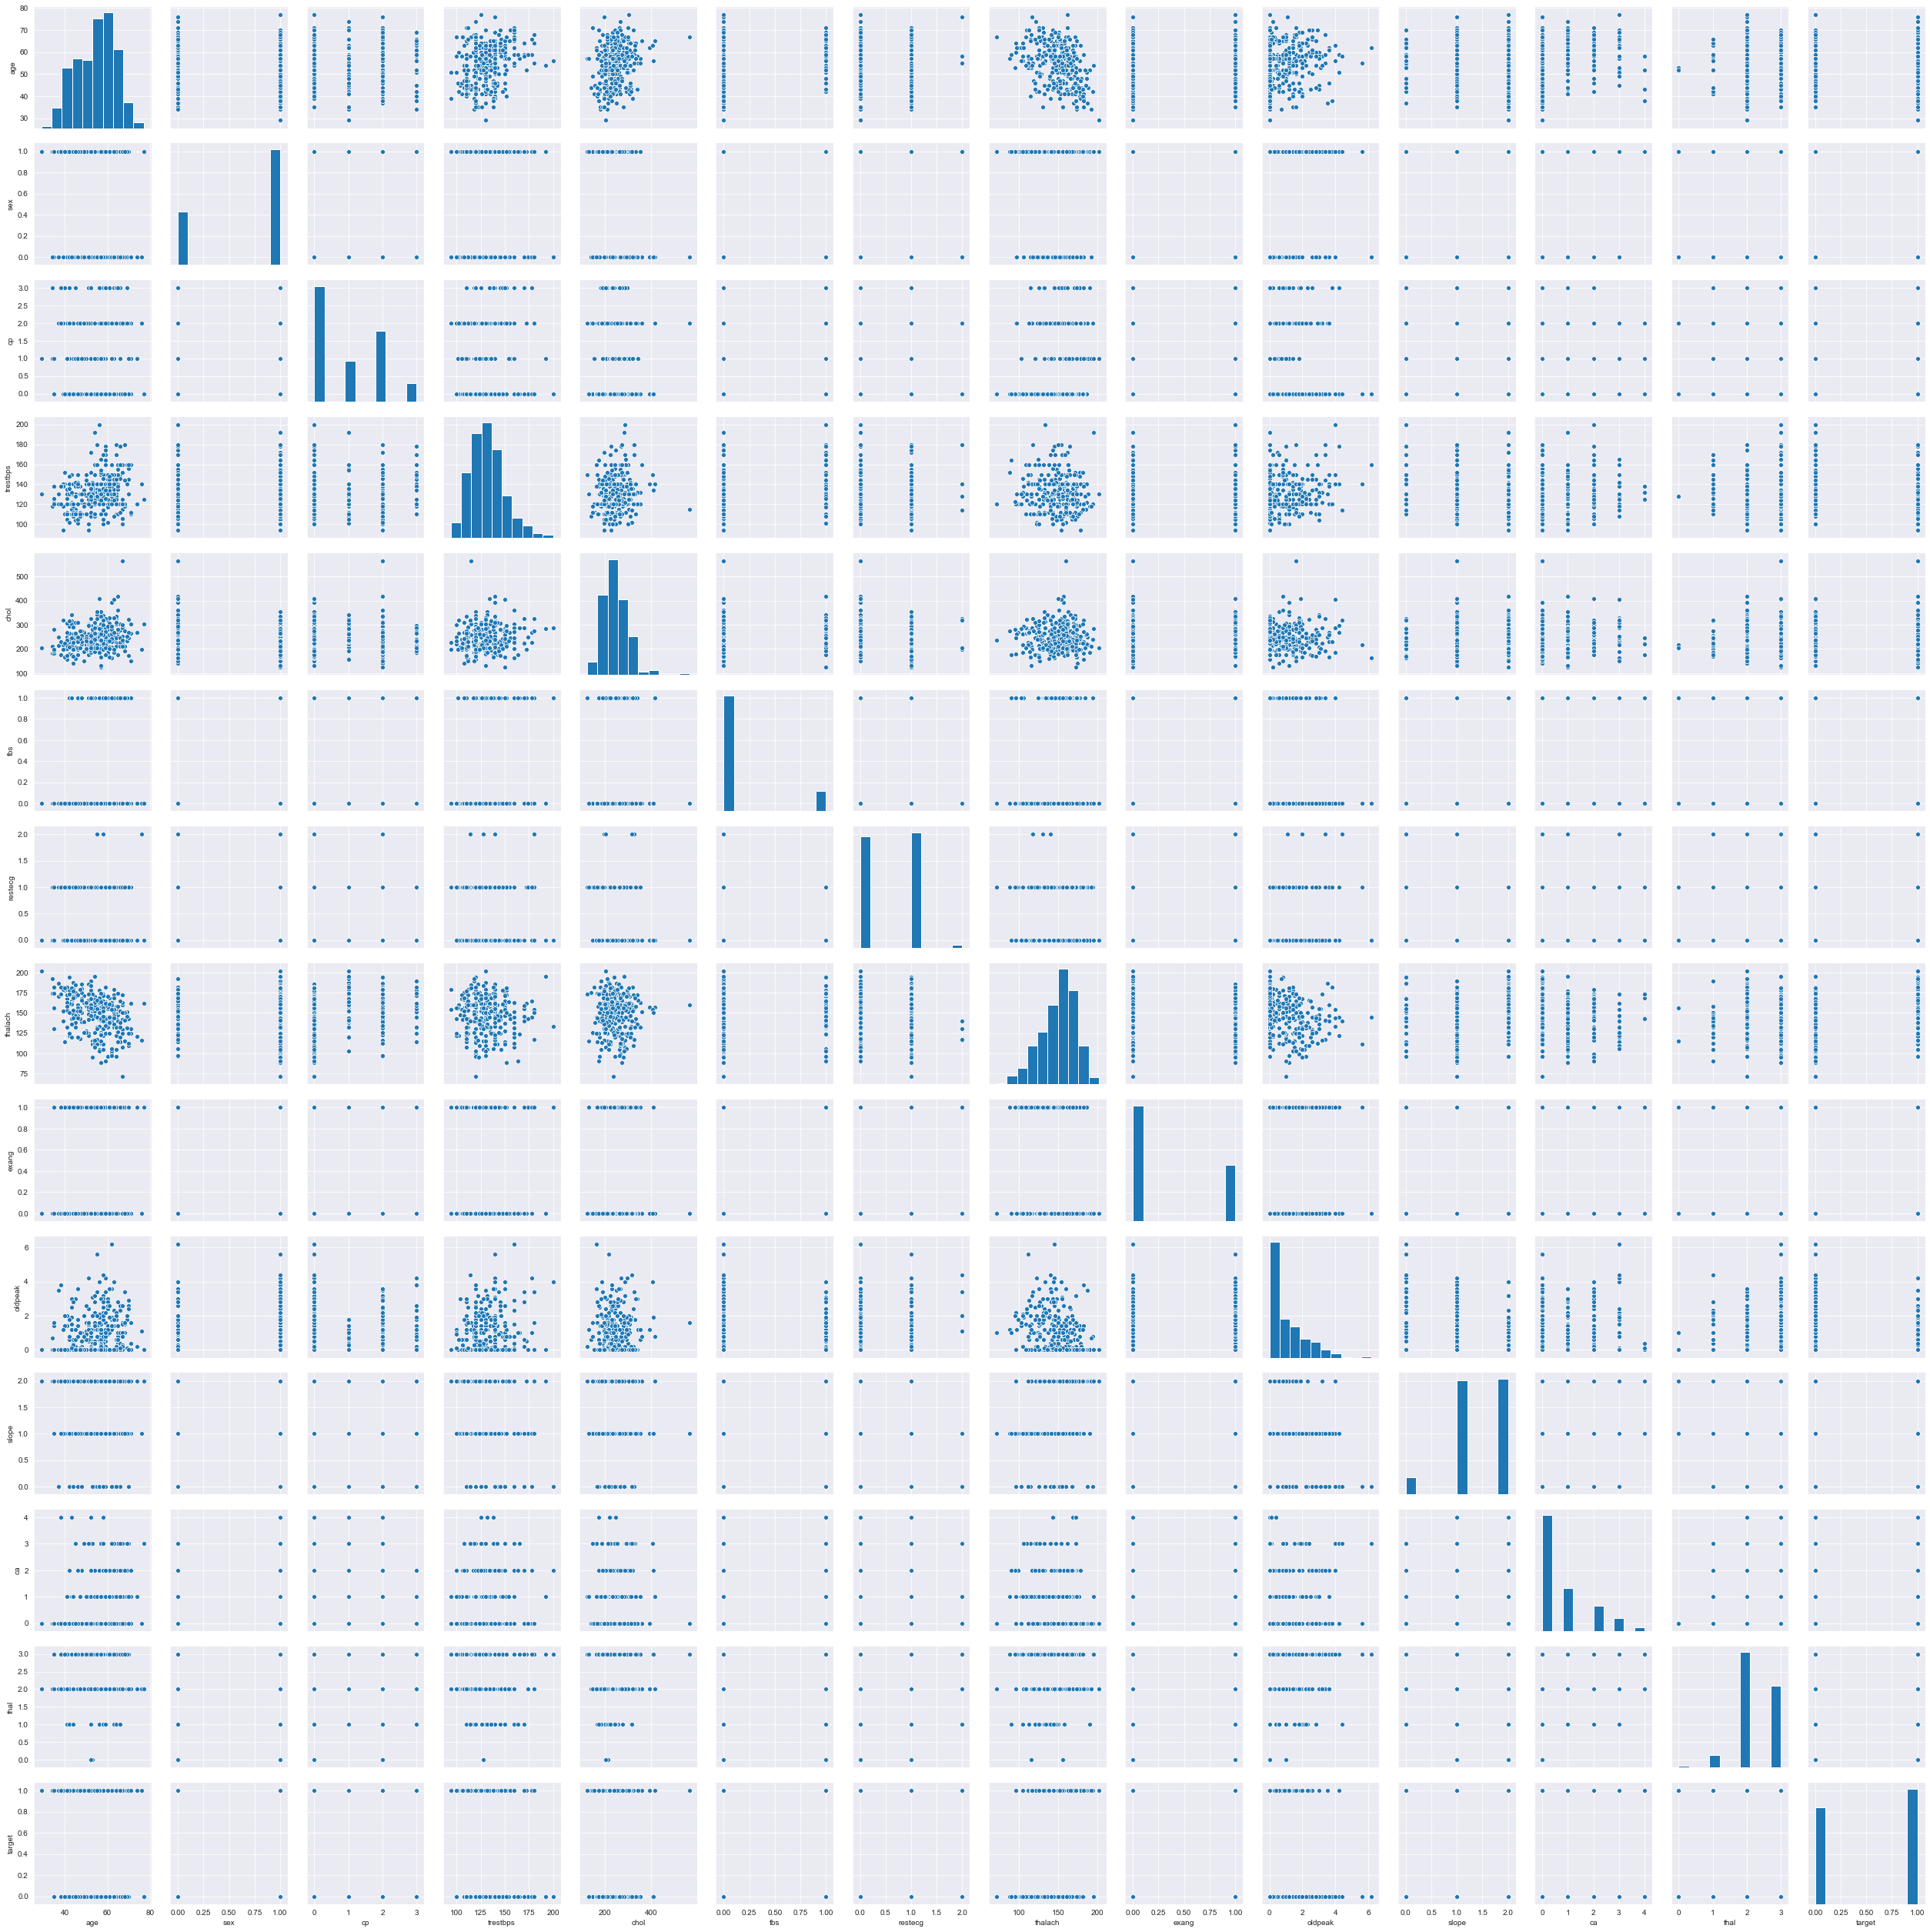

In [49]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
sns.pairplot(df)

### ScatterPlot

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

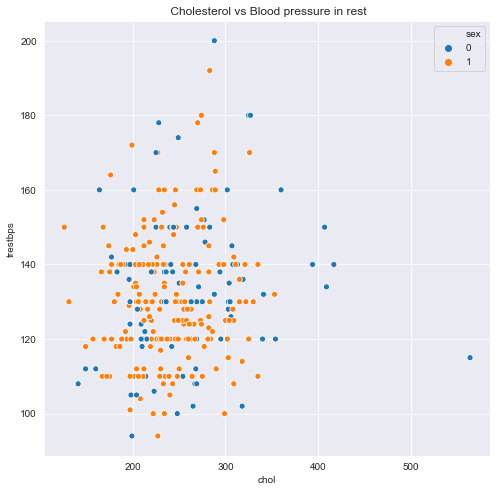

In [50]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=df)
plt.title(' Cholesterol vs Blood pressure in rest')

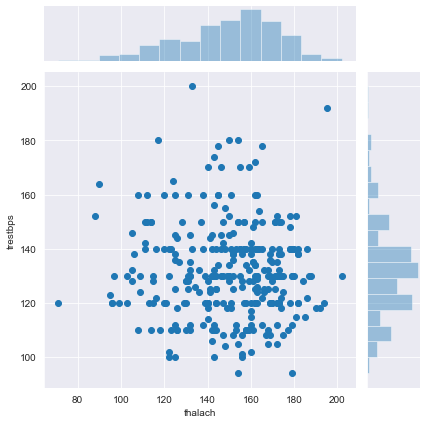

In [51]:
sns.jointplot(x='thalach', y='trestbps',  data=df)

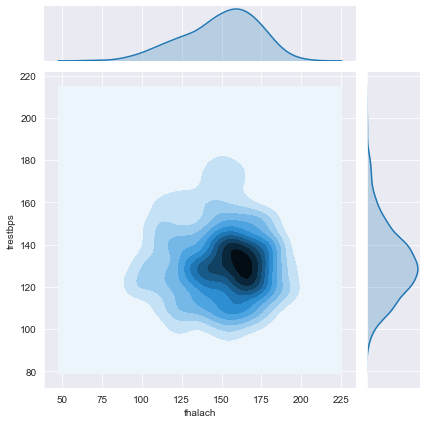

In [52]:
sns.jointplot(kind='kde', x='thalach', y='trestbps', data=df)

This plot uses a color scale to represent the density, i.e. the local where the majority of the data points fall. In this case, the points are concentrated around 170, 130 in the axis x and y respectively

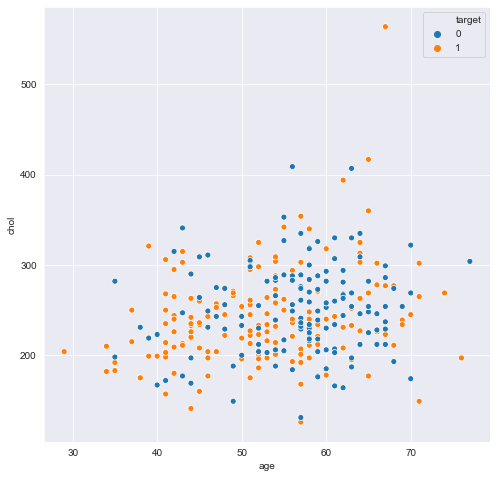

In [53]:
sns.scatterplot(x='age', y='chol', hue='target', data = df)

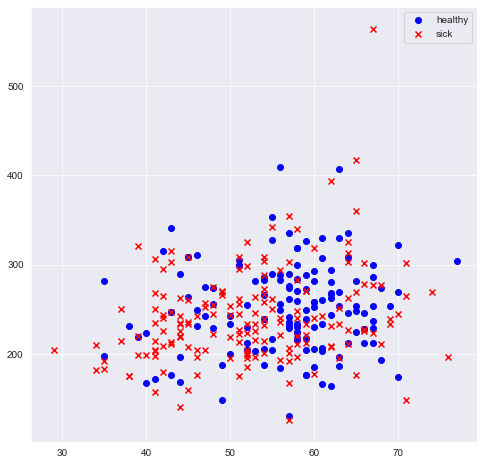

In [54]:
plt.figure()
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['chol'], marker='o', c='blue', label='healthy')
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['chol'], marker='x', c='red', label='sick')

plt.legend()

## Boxplots - Quantitative/Categorical Plots

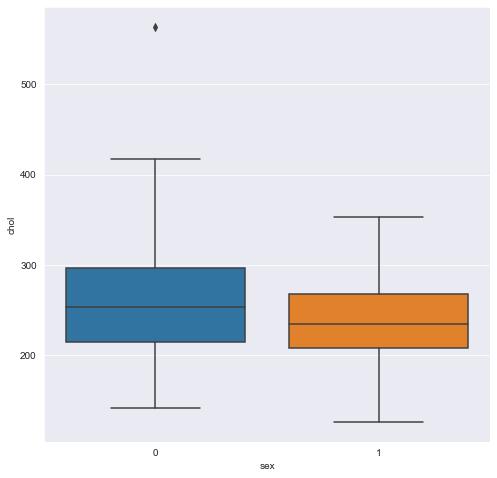

In [55]:
sns.boxplot(x='sex', y='chol', data=df)

Apparently, female patients has higher cholesterol indices than male patients.

catplot()默认的处理方式就是散点图。在绘制分类散点图时，我们会遇到一个挑战，当在同一个类别中出现大量取值相同或接近的观测数据时，他们会挤到一起。seaborn中有两种分类散点图，分别以不同的方式处理了这个问题。catplot()使用的默认方式是stripplot()，它给这些散点增加了一些随机的偏移量：

箱体上下方的须线会分别向上和向下延伸1.5倍IQR（上下四分位数之间的距离），落在这个区域之外的点会单独显示为离群点（异常值）。

<Figure size 1080x720 with 0 Axes>

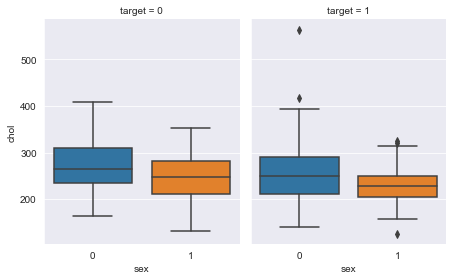

In [56]:
plt.figure(figsize=(15,10))

# col : columns 
sns.catplot(x='sex', y='chol', col='target', data=df, kind='box', height=4, aspect=.8)

visualize if the diagnose is influenced by age

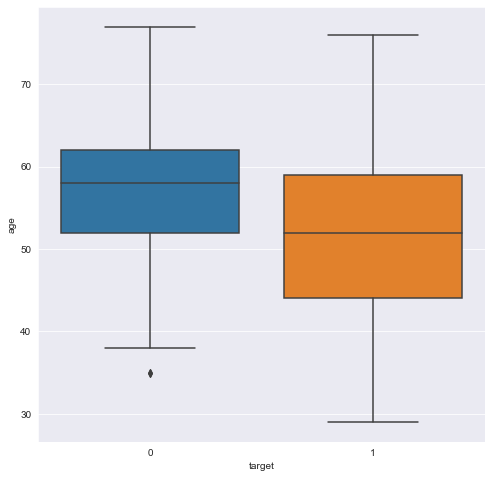

In [57]:
sns.boxplot(y='age', x='target', data = df)